In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
plt.style.use('seaborn')

### Data Preparation

In [84]:
mean_01 = ([1, 0.5])
cov_01 = ([[1, 0.1], [0.1, 1.2]])

mean_02 = ([4, 5])
cov_02 = ([[1.21, 0.1], [0.1, 1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


### Visualisation

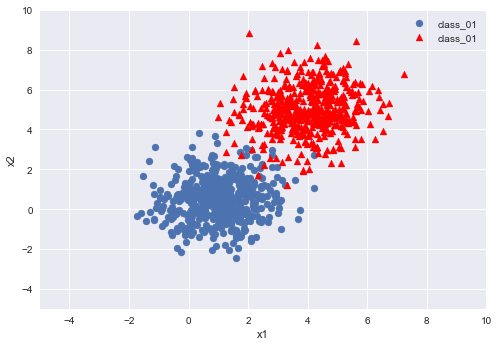

In [85]:
plt.figure(0)
plt.scatter(dist_01[:,0], dist_01[:, 1], label = 'class_01')
plt.scatter(dist_02[:,0], dist_02[:, 1], color = 'r', marker = '^', label = 'class_01')
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Create Training and test set

In [86]:
data = np.zeros((1000,3))
print(data.shape)

data[:500, :2] = dist_01
data[500:, :2] = dist_02
data[500: , -1] = 1.0

np.random.shuffle(data)
print(data[:10])
split = int(0.8*data.shape[0])

X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1000, 3)
[[6.44099032 4.96582483 1.        ]
 [0.18434147 0.22883764 0.        ]
 [2.95017682 5.64203797 1.        ]
 [0.65310715 0.82180906 0.        ]
 [4.89618738 5.90380961 1.        ]
 [4.70883853 6.37891386 1.        ]
 [4.24802267 6.20320263 1.        ]
 [1.81565998 5.25831923 1.        ]
 [1.77527078 0.35524915 0.        ]
 [3.65106545 4.50257851 1.        ]]
(800, 2) (200, 2)
(800,) (200,)


## Logistic Regression

In [87]:
def hypothesis(x, w, b):
    """Accepts input vector x, input weight w, and bias term b"""
    h = np.dot(x, w) + b
    return sigmoid(h)
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-1.0*x))
def error(y_true, x, w, b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    return -err/m
def get_grads(y_true, x, w, b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        grad_w += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i] - hx)
    grad_w /= m
    grad_b /= m
    return [grad_w, grad_b]

# One iteration of gradient descent
def grad_descent(x, y_true, w, b, learning_rate=0.1):
    err = error(y_true, x, w, b)
    [grad_w, grad_b] = get_grads(y_true, x, w, b)
    w = w+learning_rate*grad_w
    b = b+learning_rate*grad_b
    return err, w, b
def predict(x, w, b):
    confidence = hypothesis(x, w, b)
    if confidence < 0.5:
        return 0
    else:
        return 1
def get_acc(x_test, y_test, w, b):
    y_pred = []
    for i in range(y_test.shape[0]):
        p = predict(x_test[i], w, b)
        y_pred.append(p)
    y_pred = np.array(y_pred)
#     print(((y_pred==y_test)))
    return float((y_pred==y_test).sum())/y_test.shape[0]

In [94]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()


In [96]:
for i in range(1000):
    l, W, b = grad_descent(X_train, Y_train, W, b, learning_rate=0.1)
    acc.append(get_acc(X_test, Y_test, W, b))
    loss.append(l)

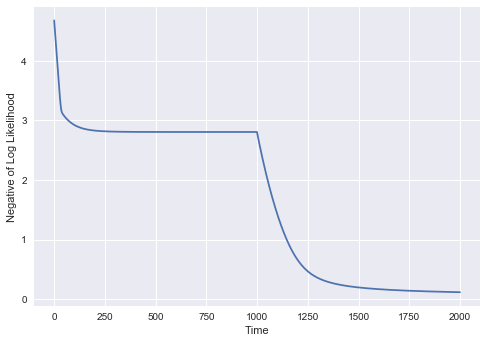

In [97]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

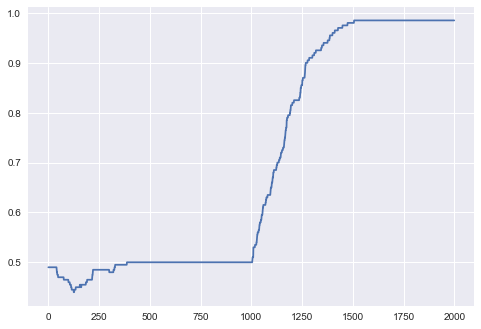

0.985


In [98]:
plt.plot(acc)
plt.show()
print(acc[-1])

## Decision Boundary

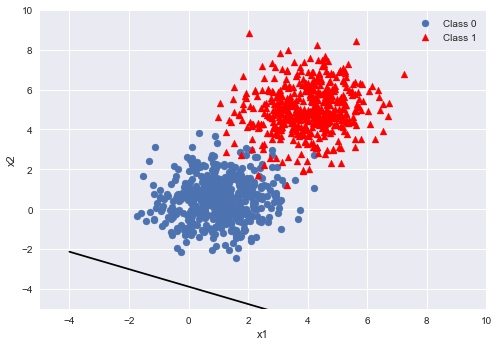

In [99]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + B)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()